# TUGAS PENGATURAN & PENGGUNAAN MOTOR LISTRIK & PLC
## NAMA: Felix Ivander Ganumba
## NIM: 180402084
Catatan: Program dijalankan menggunakan bahasa pemrograman Python dikarenakan tidak efisiennya excel digunakan dalam kasus ini dikarenakan banyaknya iterasi yang dibutuhkan dikarenakan resolusi dan banyaknya data agar grafik akurat dan juga karena banyaknya cell yang terisi oleh angka pada Excel.

In [2]:
#default value
default_Rs = 0.344
default_Rr= 0.147
default_Xs = 0.498
default_Xr= 0.225
default_Vs = 400
default_f = 50
default_b = 1

<h3>1. Kurva Td  vs  Slip untuk:</h3>
<h3>
a.<ul>
    <li>b1= 0.6</li>
    <li>b2= 0.8</li>
    <li>b3= 1.0</li>
  </ul>
</h3>
<h3>
b.<ul>
    <li>Rr1'= 220%Rr</li>
    <li>Rr2'= 150%Rr</li>
    <li>Rr3'= 100%Rr</li>
</ul>
</h3>
<h3>
c.<ul>
    <li>f1= 50 Hz</li>
    <li>f2= 35 Hz</li>
    <li>f3= 20 Hz</li>
</ul>
</h3>
<h1> $$Td= \frac {3R_r'(bV_s)^2}{sw_s[(R_s + R_r'/s)^2 + (X_s + X_r')^2]}$$ </h1>

In [3]:
import matplotlib.pyplot as plt
import numpy as np

            Td
0    99.010244
1   188.042601
2   267.167858
3   336.729001
4   397.261534
..         ...
95  303.895615
96  301.376115
97  298.896165
98  296.454899
99  294.051473

[100 rows x 1 columns]


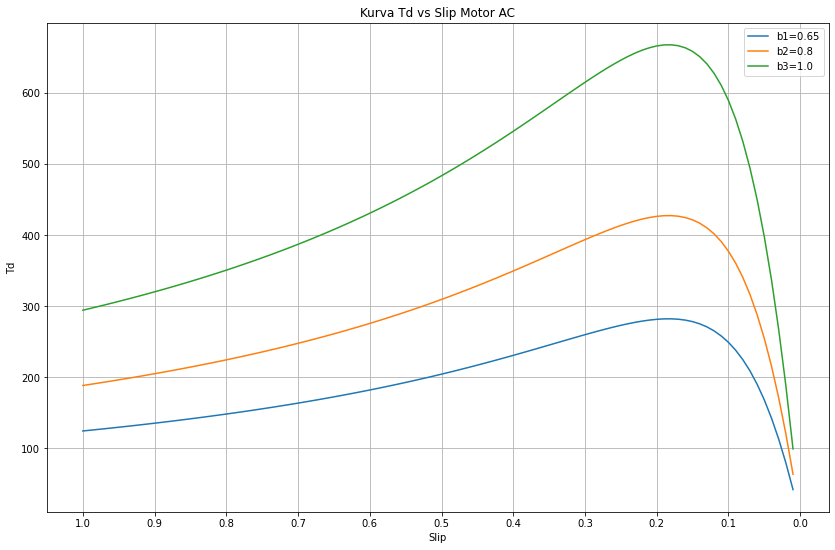

In [27]:
#1a
b=[0.65, 0.8, 1.0]
ws= 2*np.pi*default_f
s= np.arange(0.01, 1.01, 0.01)

plt.figure(figsize=(14,9))
plt.title("Kurva Td vs Slip Motor AC")
plt.ylabel("Td")
plt.xlabel("Slip")
plt.xticks(np.arange(0, 1.01,0.1))
for i in range(0, len(b)):
    td=[]
    for j in range(0, len(s)):
        td.append((3*default_Rr*(b[i]*default_Vs)**2)/((s[j]*ws)*((default_Rs + default_Rr/s[j])**2 + (default_Xs + default_Xr)**2)))
    plt.plot(s, td, label=f"b{i+1}={b[i]}")

import pandas as pd
df = pd.DataFrame(td, columns=['Td'])
print(df)
plt.gca().invert_xaxis()
plt.grid()
plt.legend()
plt.show()

In [30]:
df['slip (b=1)']= s
df

,Td,slip (b=1)
0,99.010244,0.01
1,188.042601,0.02
2,267.167858,0.03
3,336.729001,0.04
4,397.261534,0.05
...,...,...
95,303.895615,0.96
96,301.376115,0.97
97,298.896165,0.98
98,296.454899,0.99


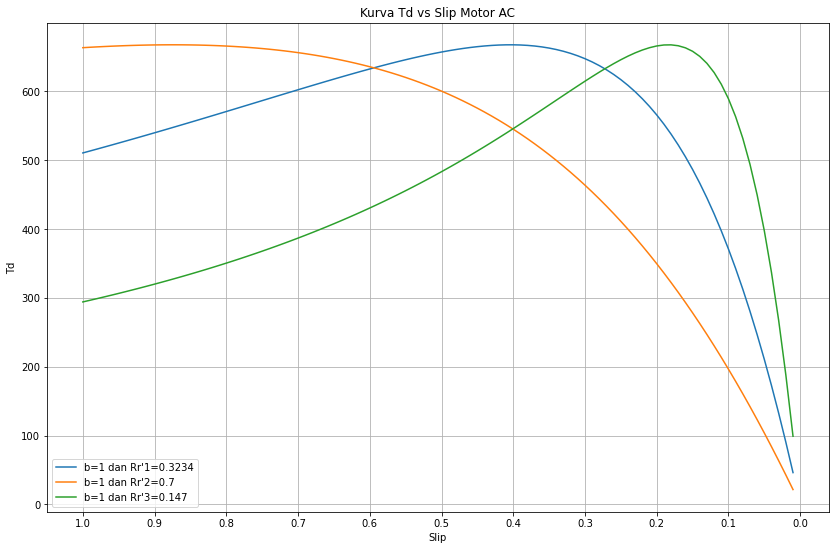

In [34]:
#1b
Rr=np.array([220/100, 150/100, 100/100])
Rr= np.round(0.147*Rr,4)
ws= 2*np.pi*default_f
s= np.arange(0.01, 1.01, 0.01)
Rr[1]= 0.7

plt.figure(figsize=(14,9))
plt.title("Kurva Td vs Slip Motor AC")
plt.ylabel("Td")
plt.xlabel("Slip")
plt.xticks(np.arange(0, 1.01,0.1))
plt.yticks(np.arange(0,801,100))
for i in range(0, len(Rr)):
    td=[]
    for j in range(0, len(s)):
        td.append((3*Rr[i]*(default_b*default_Vs)**2)/((s[j]*ws)*((default_Rs + Rr[i]/s[j])**2 + (default_Xs + default_Xr)**2)))
    plt.plot(s, td, label=f"b={default_b} dan Rr'{i+1}={Rr[i]}")
        
plt.gca().invert_xaxis()
plt.grid()
plt.legend()
plt.show()

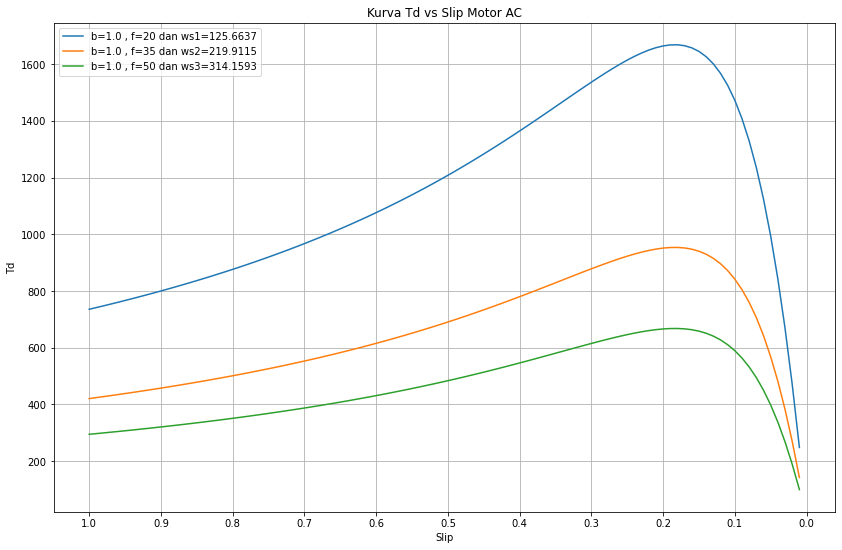

In [37]:
#1c
f=np.array([20, 35, 50])
ws= np.round(2*np.pi*f,4)
s= np.arange(0.01, 1.01, 0.01)
b[1]=1
plt.figure(figsize=(14,9))
plt.title("Kurva Td vs Slip Motor AC")
plt.ylabel("Td")
plt.xlabel("Slip")
plt.xticks(np.arange(0, 1.01,0.1))
for i in range(0, len(ws)):
    td=[]
    for j in range(0, len(s)):
        td.append((3*default_Rr*(b[1]*default_Vs)**2)/((s[j]*ws[i])*((default_Rs + default_Rr/s[j])**2 + (default_Xs + default_Xr)**2)))
    plt.plot(s, td, label=f"b={b[1]} , f={f[i]} dan ws{i+1}={ws[i]}")

plt.gca().invert_xaxis()
plt.grid()
plt.legend()
plt.show()

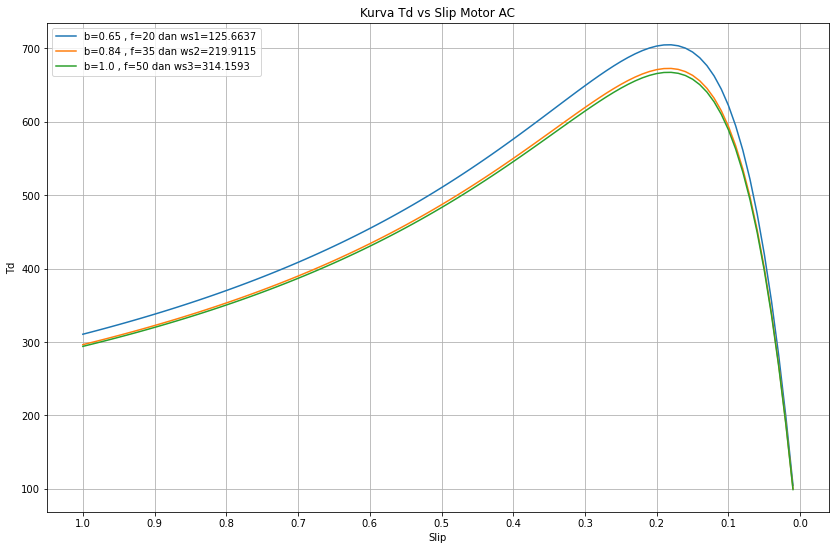

In [40]:
f=np.array([20, 35, 50])
ws= np.round(2*np.pi*f,4)
s= np.arange(0.01, 1.01, 0.01)
b=[0.65,0.84,1.0]
plt.figure(figsize=(14,9))
plt.title("Kurva Td vs Slip Motor AC")
plt.ylabel("Td")
plt.xlabel("Slip")
plt.xticks(np.arange(0, 1.01,0.1))
for i in range(0, len(ws)):
    td=[]
    for j in range(0, len(s)):
        td.append((3*default_Rr*(b[i]*default_Vs)**2)/((s[j]*ws[i])*((default_Rs + default_Rr/s[j])**2 + (default_Xs + default_Xr)**2)))
    plt.plot(s, td, label=f"b={b[i]} , f={f[i]} dan ws{i+1}={ws[i]}")

plt.gca().invert_xaxis()
plt.grid()
plt.legend()
plt.show()

<h3>Buat kurva Td vs ns untuk:
    <ul>
            <li>a. f1= 50 Hz dan b1= 0.98</li>
            <li>b. f2= 35 Hz dan b2= 0.85</li>
            <li>c. f3= 20 Hz dan b3= 0.65</li>
    </ul>
</h3>

<h2>
    $$Ns= \frac{120f}{P} (1-s)$$
diasumsi jumlah kutub P= 4 sehingga:
    $$Ns=30f (1-s)$$
</h2>

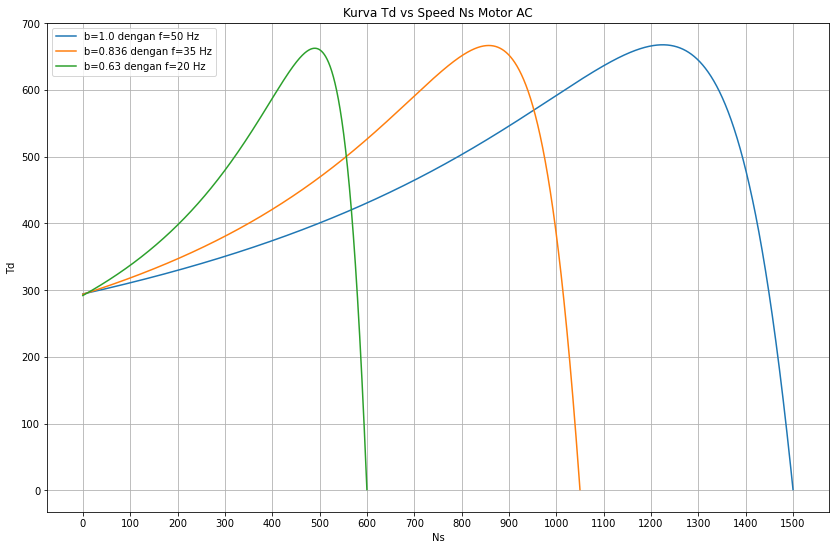

In [42]:
#2
b=np.array([1, 0.836, 0.63])
f=np.array([50, 35, 20])
s= np.linspace(1,0.0001, 100000, endpoint=True)
ws=2*np.pi*f
ns= []
for i in range(0,len(f)):
    ns.append(30*f[i]*(1-s))

plt.figure(figsize=(14,9))
plt.title("Kurva Td vs Speed Ns Motor AC")
plt.ylabel("Td")
plt.xlabel("Ns")
plt.xticks(np.arange(0,1600,100))

#perubahan b
for i in range(0, len(f)):
    td=[]
    for j in range(0, len(s)):
        td.append((3*default_Rr*(b[i]*default_Vs)**2)/((s[j]*ws[i])*((default_Rs + default_Rr/s[j])**2 + (default_Xs + default_Xr)**2)))
    plt.plot(ns[i][:], td, label=f"b={b[i]} dengan f={f[i]} Hz")

plt.grid()
plt.legend()
plt.show()

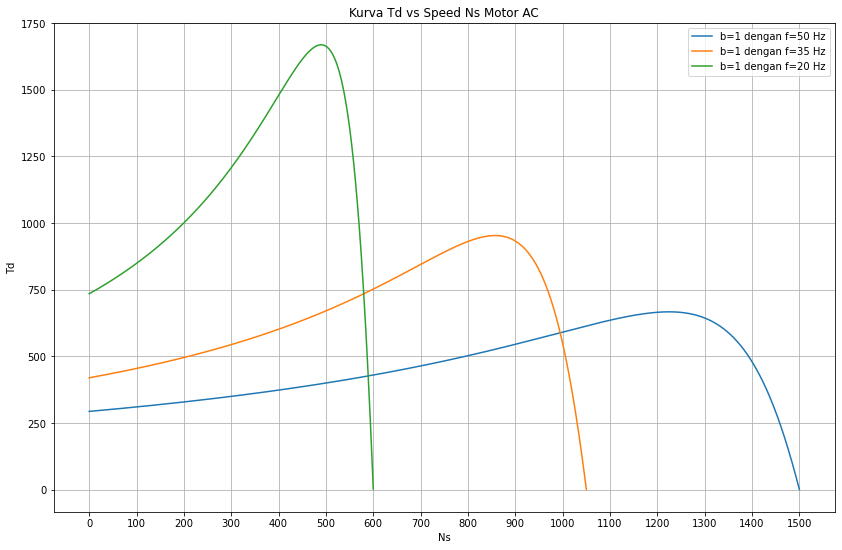

In [44]:
#2
f=np.array([50, 35, 20])
s= np.linspace(1,0.0001, 100000, endpoint=True)
ws=2*np.pi*f
ns= []
for i in range(0,len(f)):
    ns.append(30*f[i]*(1-s))

plt.figure(figsize=(14,9))
plt.title("Kurva Td vs Speed Ns Motor AC")
plt.ylabel("Td")
plt.xlabel("Ns")
plt.xticks(np.arange(0,1600,100))

#perubahan b
for i in range(0, len(f)):
    td=[]
    for j in range(0, len(s)):
        td.append((3*default_Rr*(default_b*default_Vs)**2)/((s[j]*ws[i])*((default_Rs + default_Rr/s[j])**2 + (default_Xs + default_Xr)**2)))
    plt.plot(ns[i][:], td, label=f"b={default_b} dengan f={f[i]} Hz")

plt.grid()
plt.legend()
plt.show()

[array([0.000000e+00, 1.499865e-02, 2.999730e-02, ..., 1.499820e+03,
        1.499835e+03, 1.499850e+03]),
 array([0.0000000e+00, 1.0499055e-02, 2.0998110e-02, ..., 1.0498740e+03,
        1.0498845e+03, 1.0498950e+03]),
 array([0.00000000e+00, 5.99945999e-03, 1.19989200e-02, ...,
        5.99928001e+02, 5.99934001e+02, 5.99940000e+02])]